In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [10]:
reference = cv2.imread('/Users/saisrithaja/Desktop/bml/fruit.jpeg', cv2.IMREAD_GRAYSCALE)

In [11]:
M, N = reference.shape
print(M,N)

1204 1880


In [12]:
# Low Quality gray scale image
low_quality = 0.01 * reference

In [13]:
# LowQuality image is the low contrast gray scale image
SR = np.zeros((M, N), dtype=np.float64)
threshold = np.sum(low_quality) / (M * N)

In [14]:
# A gaussian generated random number is added with the low quality image
# Then it becomes noisy image
# 100 such noisy images are created and average is taken
sigma = 0.5

mse_values = []  # List to store MSE values

for _ in range(10):
    noisy = sigma * np.random.randn(M, N) + low_quality
    modified = np.where(noisy > threshold, 255, 0)
    SR += modified
    
    # Calculate MSE between the modified image and the reference image
    mse = np.mean((modified - reference) ** 2)
    mse_values.append(mse)

SR /= 10


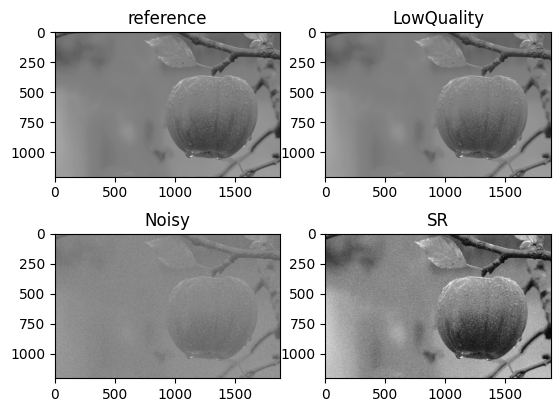

In [22]:

# Displaying the images
plt.subplot(2, 2, 1)
plt.title('reference')
plt.imshow(reference, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('LowQuality')
plt.imshow(low_quality, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Noisy')
plt.imshow(noisy, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('SR')
plt.imshow(SR, cmap='gray')

# The last subplot (2,2,4) is not completed in the provided code.
# If you want to display another image, you should load it and then use imshow to display it.
# For example:
# another_image = cv2.imread('path_to_image', cv2.IMREAD_GRAYSCALE)
# plt.subplot(2, 2, 4)
# plt.imshow(another_image, cmap='gray')
plt.show()

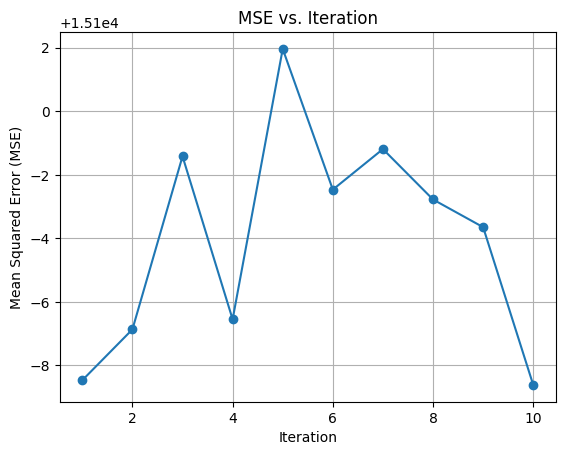

In [17]:
plt.plot(range(1, 11), mse_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Iteration')
plt.grid(True)
plt.show()